##### <h1 style="color:Green;">Week 4 Lecture Source Code</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/1_jQKSrS4hiVJaxnFYhRh284AhAbPxI0CL0qAP4Iz-DE/edit#slide=id.p">[Week 4 Lecture Link Here]</a>

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_multilabel_classification
import pandas_datareader as pdr

What is Classification?

Classification is a supervised learning concept that uses one or more predictors (features, independent variables) to categorize a set of data into classes. This concept can be applied to solve two-class or multi-class calssification problems, in real-world scenarios such as:

• Identifying economic cycles (e.g., expansion, peak, through, recession)

• Classifying credit card transactions as legitimate or fraudulent

• Classifying market strend structures as uptrend, congestion, downtrend

• Categorizing news stories of finance as having positive, neutral, or negative sentiments

• Recognizing handwritten checks and digits as one of {A, B, C, …, Z, 0, 1, ... 9}

• Assigning trading attributes to their origin of cause (e.g., Greece, UK, Russia)


Note that different assumptiosn are made for each classification model.

<h2 style="color:Green;">Simulated Data (pg. 3)</h2>

Let's use the data we processed from last lecture. This contains sector ETFs, XLK (Technology) and IYC (Consumer Discretionary), as well as SPY (S&P 500) directions from 1/25/2018 to 5/31/2022, a total of 1086 trading days.

In [31]:
df = pd.read_csv('SPY_XLK_IYC.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1086 non-null   object 
 1   SPY     1086 non-null   int64  
 2   XLK     1086 non-null   float64
 3   IYC     1086 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 34.1+ KB


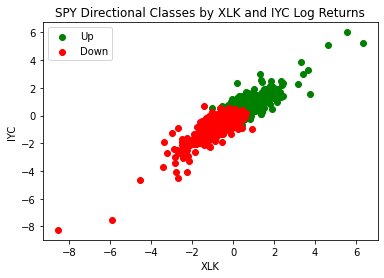

In [34]:
plt.scatter(df.XLK[df.SPY == 1],
            df.IYC[df.SPY == 1],
           color='green',
           label='Up')
plt.scatter(df.XLK[df.SPY == 0],
            df.IYC[df.SPY == 0],
           color='red',
           label='Down')
plt.title('SPY Directional Classes by XLK and IYC Log Returns')
plt.xlabel('XLK')
plt.ylabel('IYC')
plt.legend()
plt.show()

From the scatter plot, besides a fairly strong linear relationship, we can see that the data points are divided into red and green colors, green representing an upward direction in SPY and red represeneting a downward direction in SPY. One of the most popular problems in quantitative finance is to find a classifier (model) that most-accurately separates the data points that indicates and upward directional from those that indicate a downward move. Through this model, we will be able to predict under any given conditions of XLK and IYC log returns, which direction would SPY be expected to move in the next trading day. 